**Instructions**: The dataset is stored in google drive of one of our team members. [Doesn't require login if working in Google colab.]
If you are working on locally stored, data. Change the filepath below.

In [0]:
import sys
colab = 'google.colab' in sys.modules

In [0]:
# Load data
path = "/content/EGC_dataset.csv"

import pandas as pd
df = pd.read_csv(path)
df.head()

,series,booktitle,year,title,abstract,authors,pdf1page,pdfarticle
0,Revue des Nouvelles Technologies de l'Information,EGC,2018,#Idéo2017 : une plateforme citoyenne dédiée à ...,Cette plateforme a pour objectif de permettre ...,"Claudia Marinica, Julien Longhi, Nader Hassine...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002425
1,Revue des Nouvelles Technologies de l'Information,EGC,2018,A two level co-clustering algorithm for very l...,La classification croisée (co-clustering) est ...,"Marius Barctus, Marc Boullé, Fabrice Clérot",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002372
2,Revue des Nouvelles Technologies de l'Information,EGC,2018,ALGeoSPF: Un modèle de factorisation basé sur ...,La recommandation de points d'intérêts est dev...,"Jean-Benoît Griesner, Talel Abdesssalem, Huber...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002380
3,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse des sentiments à partir des commentair...,L'analyse des sentiments est un processus pend...,"Abdeljalil Elouardighi, Mohcine Maghfour, Hafd...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002397
4,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse en rôles sémantiques pour le résumé au...,Cet article présente une approche visant à ext...,"Elyase Lassouli, Yasmine Mesbahi, Camille Prad...",http://editions-rnti.fr/render_pdf.php?p1&p=10...,http://editions-rnti.fr/render_pdf.php?p=1002384


In [0]:
list_col = df.columns
print('Data size:', df.shape, '\n')
print('Columns:',list_col)

Data size: (1269, 8) 

Columns: Index(['series', 'booktitle', 'year', 'title', 'abstract', 'authors',
       'pdf1page', 'pdfarticle'],
      dtype='object')


In [0]:
# Check for empty data
import numpy as np

cols_to_check = ['title','abstract','authors']
for i in cols_to_check:
  index_missing = np.where(df.isnull()[i])
  print('# samples with no', i, ':', len(index_missing[0]))

# samples with no title : 0
# samples with no abstract : 173
# samples with no authors : 0


**173 samples have no abstracts** 

In [0]:
# Create a seperate dataset removing these rows
df1 = df.copy()
get_missing_index = np.where(df.isnull()['abstract'])[0]
df1 = df1.drop(get_missing_index)

In [0]:
print('Sample size:', df1.shape)

Sample size: (1096, 8)


**Understand data**

**Timeline**

In [0]:
years = np.sort(np.unique(df1.year))
print('Years:', years)

Years: [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]


**Published papers per year [Including paper where abstract is missing, since for these, we have a title.]**

In [0]:
year_dist = df.groupby([df['year']]).agg('count')['title']

In [0]:
sorted_table = np.c_[years,year_dist]
sorted_table = sorted_table[sorted_table[:,1].argsort()]

Text(0.5, 1.0, 'Number of articles per year')

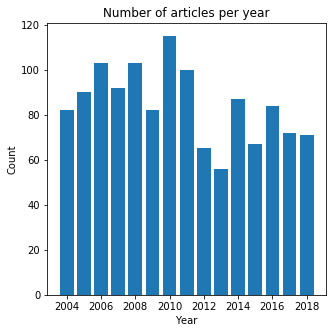

In [0]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.bar(years, year_dist)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of articles per year')

**2010 has maximum number of papers published. Least were published in 2013.**

In [0]:
mean_pub = np.mean(year_dist)
print('Mean publications per year:', np.round(mean_pub,2))

Mean publications per year: 84.6


**Unique authors**

Since a publication can have many authors. Count the number of authors per publication as well as overall unique authors and their contributions.

In [0]:
def get_unique_authors(df):
  authors = df.authors.str.split(',')
  result =  [list(map(str.strip, sublist)) for sublist in authors for item in sublist] 
  flattened_authors = [item for sublist in result for item in sublist]
  unique_authors = np.unique(np.array(flattened_authors))
  return unique_authors, authors

In [0]:
unique_authors, authors = get_unique_authors(df)
print(unique_authors)
num_classes = len(unique_authors)
print("# of unique authors in all years: ", num_classes)

['Abdelaziz Bensrhair' 'Abdelaziz Marzak' 'Abdelfettah Feliachi' ...
 'Éric Sardet' 'Éric Trupin' 'Étienne-Cuvelier']
# of unique authors in all years:  2007


year:  2004  authors:  196
year:  2005  authors:  212
year:  2006  authors:  241
year:  2007  authors:  223
year:  2008  authors:  265
year:  2009  authors:  197
year:  2010  authors:  277
year:  2011  authors:  243
year:  2012  authors:  168
year:  2013  authors:  154
year:  2014  authors:  227
year:  2015  authors:  181
year:  2016  authors:  231
year:  2017  authors:  199
year:  2018  authors:  225
Average number of authors per year:  215.93333333333334


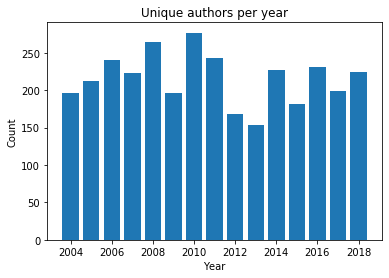

In [0]:
years = np.unique(df.year)
frequency_dic = {}
to_be_averaged = 0
for year in years:
  df_year = df.loc[df.year==year]
  uni_auth, auth = get_unique_authors(df_year)
  len_unique_authors = len(uni_auth)
  print("year: ", year, " authors: ", len_unique_authors)
  to_be_averaged += len_unique_authors
  frequency_dic[year] = len_unique_authors

plt.bar(list(frequency_dic.keys()), list(frequency_dic.values()), align='center')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Unique authors per year')
plt.savefig("authors_dis.png")
print("Average number of authors per year: ", to_be_averaged / len(years))

In [0]:
# Number of authors per paper
def get_authors_pp(df):
  count = []

  for i in range(df.shape[0]):
    authors = len(df.authors[i].split(','))
    count.append(authors)
  return count

In [0]:
authors_pp = get_authors_pp(df)
print('Authors per paper (mean over all years):', np.mean(authors_pp))

Authors per paper (mean over all years): 2.9472025216706066


In [0]:
# Mean authors per paper by year
def get_authors_ppy(df,years):
  count_ = []
  mean_ = []
  for k in years:
    df_year = df[df['year']==k]
    count = 0
    for i in range(df_year.shape[0]):
      authors = len(df_year.authors.iloc[i].split(','))
      count += authors
    mean_authors_pp_k = count/df_year.shape[0]
    count_.append(mean_authors_pp_k)

  return count_

Average number of authors per paper: [2.73 2.67 2.73 2.74 2.9  2.91 3.03 2.91 2.85 3.12 3.05 2.94 3.25 3.15
 3.44]


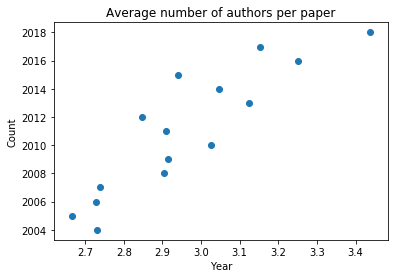

In [0]:
authors_ppy = get_authors_ppy(df,years)
print('Average number of authors per paper:', np.round(authors_ppy,2))

plt.scatter(authors_ppy,years)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Average number of authors per paper')
plt.savefig("authors_dis.png")

**Number of authors per year seem to be growing. In 2004, it was 2.73 per paper, in 2018, it's close to 3.5**

Since this indicates more collaboration, we can look into correlations between authors and collaboration among authors.

In [0]:
import keras
def one_hot_authors(row, encoder, num_classes):
  row = list(map(str.strip, row))
  encoding = encoder.transform(row)
  one_hot =  keras.utils.to_categorical(encoding, num_classes= num_classes)
  result = np.sum(one_hot,axis=0)
  # result = pd.DataFrame(result)
  return result

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(unique_authors)

LabelEncoder()

In [0]:
encoding_matrx = []
for items in authors.iteritems(): 
    res =  one_hot_authors(items[1], le, num_classes)
    encoding_matrx.append(res)

encoding_matrx = np.array(encoding_matrx)

columns_name = [i for i in range(num_classes)]
columns_name = le.inverse_transform(columns_name)
df_encoded_as_columns = pd.DataFrame(encoding_matrx, columns= columns_name)
encoded_dataset = pd.concat([df, df_encoded_as_columns], axis=1)
encoded_dataset.to_csv("encoded_dataset.csv",  encoding='utf-8')

(1269, 584)
(1269, 198)
(1269, 99)
(1269, 56)
(1269, 37)
(1269, 29)
(1269, 19)
(1269, 11)
(1269, 6)


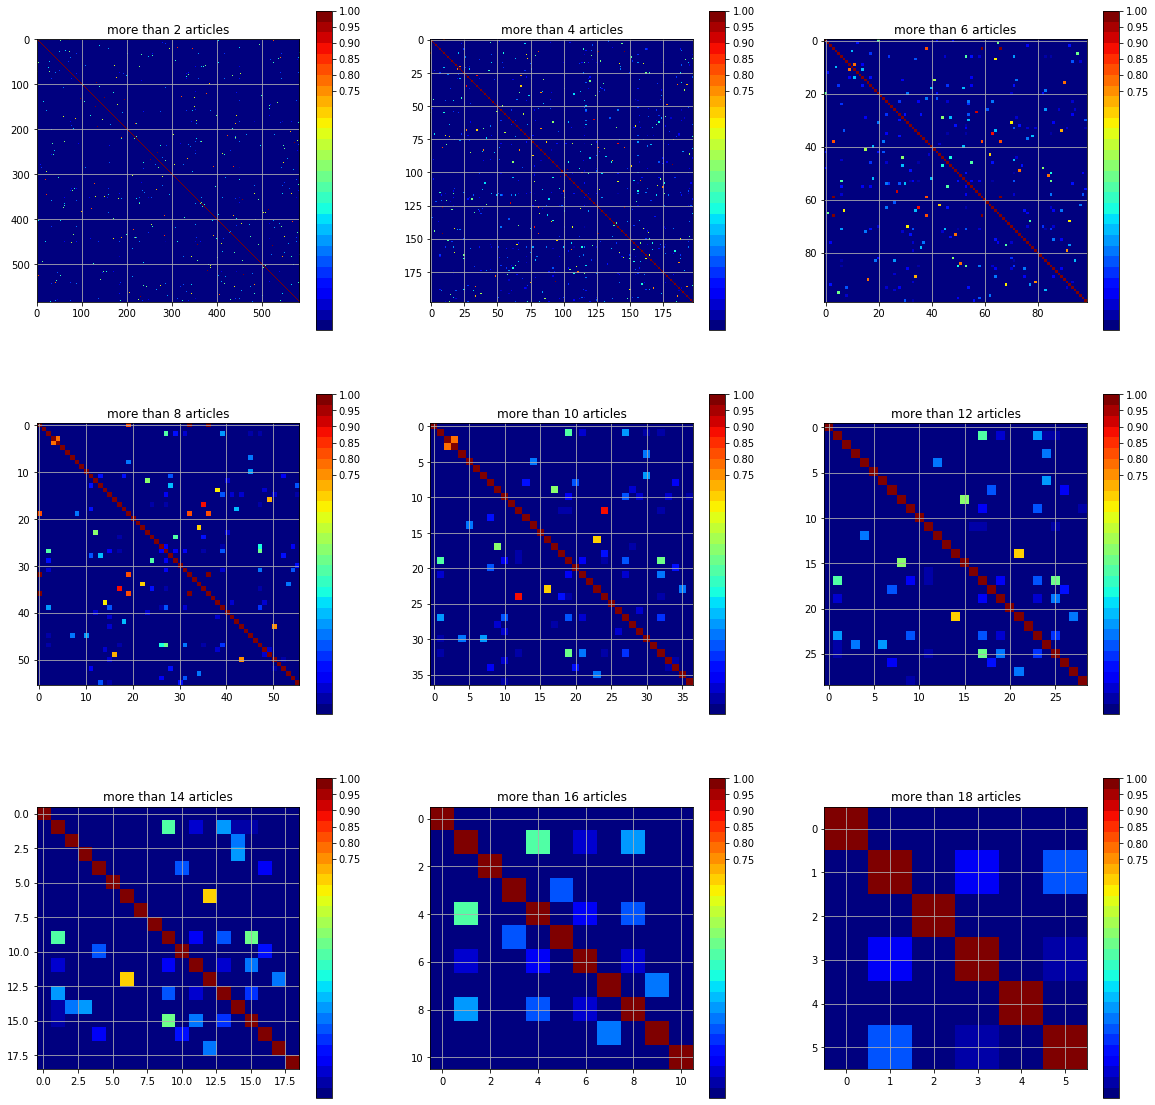

In [0]:
from matplotlib import cm as cm

threshold_frequency_dic = {}
# fig = plt.figure()
fig = plt.figure(figsize=(20, 20))
for i in range (0, 9):
  df_authors_filtered = df_encoded_as_columns.loc[:, (df_encoded_as_columns.sum(axis=0) >= ((i+1)*2) )]
  print(df_authors_filtered.shape)
  index = ((i+1)*2)
  threshold_frequency_dic[index] =df_authors_filtered.shape[1]
  c = df_authors_filtered.corr().abs()
  # ax1 = subplot(4,1,i)
  ax1 = fig.add_subplot(3,3,i+1)
  ax1.title.set_text("more than " + str(((i+1)*2)) + " articles")
  cmap = cm.get_cmap('jet', 30)
  cax = ax1.imshow(c, interpolation="nearest", cmap=cmap)
  ax1.grid(True)
  # Add colorbar, make sure to specify tick locations to match desired ticklabels
  fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
  # plt.show()

plt.savefig("coorelation.png")

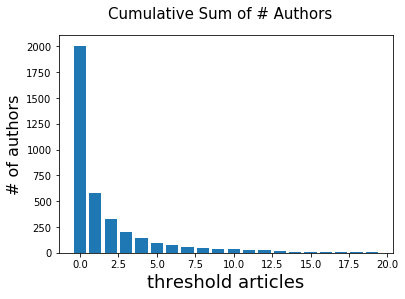

In [0]:
fig = plt.figure()
threshold_frequency_dic = {}
for i in range (0, 20):
  df_authors_filtered = df_encoded_as_columns.loc[:, (df_encoded_as_columns.sum(axis=0) >= i+1)]
  threshold_frequency_dic[i] =df_authors_filtered.shape[1]

plt.bar(list(threshold_frequency_dic.keys()), list(threshold_frequency_dic.values()),)
# plt.show()
fig.suptitle('Cumulative Sum of # Authors', fontsize=15)
plt.xlabel('threshold articles', fontsize=18)
plt.ylabel('# of authors', fontsize=16)
plt.savefig("cumsum_authors.png")

In [0]:
threshold_frequency_dic

{0: 2007,
 1: 584,
 2: 328,
 3: 198,
 4: 139,
 5: 99,
 6: 73,
 7: 56,
 8: 45,
 9: 37,
 10: 32,
 11: 29,
 12: 23,
 13: 19,
 14: 12,
 15: 11,
 16: 9,
 17: 6,
 18: 4,
 19: 4}

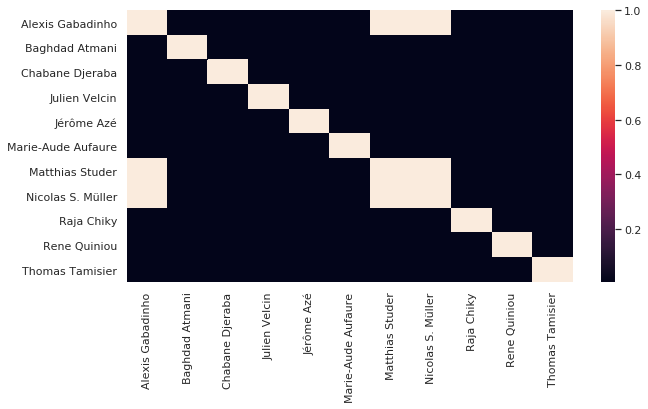

In [0]:
df_authors_filtered = df_encoded_as_columns.loc[:, (df_encoded_as_columns.sum(axis=0) == 8 )]
c = df_authors_filtered.corr().abs()

import seaborn as sns

sns.set(rc={'figure.figsize':(10,5)})
corr = c
sns_plot = sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
fig = sns_plot.get_figure()
fig.savefig("output.png")

In [0]:
def get_duplications(df):
    to_delete = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            to_delete.add((cols[i], cols[j]))
    return to_delete

def correlation_ordered(df):
    authors_corr = df.corr().abs().unstack()
    labels_to_drop = get_duplications(df)
    authors_corr = authors_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return authors_corr
print("Top Correlation")
top_correlation = correlation_ordered(df_encoded_as_columns)

Top Correlation


In [0]:
top_correlation[:4]

Bruno Bouzy        Guillaume Chaslot    1.0
Lyes Benamsili     Philippe Muller      1.0
Enric Ripoll       Tomàs Aluja-Banet    1.0
François Scharffe  Oscar Corcho         1.0
dtype: float64

In [0]:
top_correlation.to_csv("correlation.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
# df_top_correlation = pd.DataFrame(top_correlation)
df_top_correlation = top_correlation.reset_index()
df_top_correlation = pd.DataFrame(df_top_correlation)
df_top_correlation.columns = ['Author_1', 'Author_2', 'Corr']
print(df_top_correlation.loc[df_top_correlation['Corr'] < 1] [:50])

                        Author_1                    Author_2      Corr
1009              Erick Stattner             Martine Collard  0.925454
1010              Brigitte Safar             Chantal Reynaud  0.894074
1011            Frédéric Flouvat      Nazha Selmaoui-Folcher  0.869212
1012             Badre Belabbess                Olivier Curé  0.865683
1013                 Jérémy Lhez                Olivier Curé  0.865683
1014        Jean-Benoît Griesner           Talel Abdesssalem  0.865683
1015               Hubert Naacke        Jean-Benoît Griesner  0.865683
1016         Chantal Soulé-Dupuy  Nathalie Vallès-Parlangeau  0.865683
1017             Claude Pasquier               Jérémy Sanhes  0.865683
1018               André Péninou              Florence Sedes  0.865683
1019             Alban Mancheron            Lionel Vinceslas  0.865683
1020            Thierry Artières           Trinh Minh Tri Do  0.865683
1021            Alexandre Aussem              Marilys Corbex  0.865683
1022  

**Since the correlations among many authors is large. We proceed to create a co-authorship network.** For this we use R since the visualizations seems better in R [Script and saved networks are in the folder 'coauthorNetworks'].